In [164]:
# Basic Imports 
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats
import pandas as pd

# Import Models
from sklearn.mixture import GaussianMixture
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch

# Metrics for the Verification of Results
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

# Import Audio Feature Extraction from the audio 
import librosa
import librosa.display


# For the IO operations 
import os

import warnings
warnings.filterwarnings("ignore")

# Feature Extraction

In [501]:
input_directory  = "/Users/syakka/Desktop/all-samples/"
instruments = ["flute","violin","cello","banjo","clarinet","guitar","saxophone","trumpet"]
list_of_files = []
Y = []
features = []

In [502]:
def get_feature(file):
    feature = np.array([])
    y,sr = librosa.load(file)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    spectral_centroid = librosa.feature.spectral_centroid(y=y,sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y,sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=y,sr=sr)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y,sr=sr)

    ## Add the Medain Values of the features 
    feature = np.append(feature,np.mean(mfcc,1))
    feature = np.append(feature,np.mean(spectral_centroid))
    feature = np.append(feature,np.mean(spectral_bandwidth))
    feature = np.append(feature,np.mean(spectral_contrast))
    feature = np.append(feature,np.mean(spectral_rolloff))
    return feature

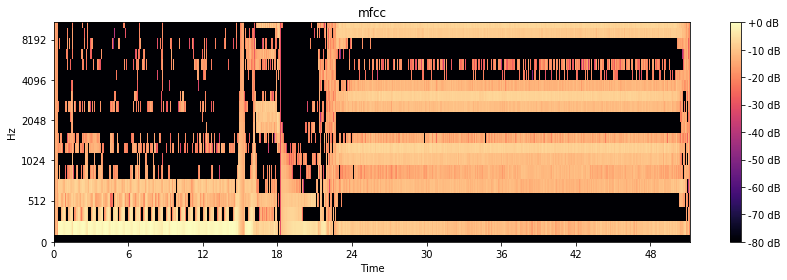

In [569]:
y,sr = librosa.load("/Users/syakka/Desktop/CS.mp3")
# Let's make and display a mel-scaled power (energy-squared) spectrogram
#S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
S1 = librosa.feature.mfcc(y, sr=sr)
#print(type(y), type(sr))

# Convert to log scale (dB). We'll use the peak power (max) as reference.
#log_S = librosa.power_to_db(S, ref=np.max)
log_S1 = librosa.power_to_db(S1, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
#librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')


librosa.display.specshow(log_S1, sr=sr, x_axis='time', y_axis='mel')
# Put a descriptive title on the plot
plt.title('mfcc')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

In [566]:
features

array([[-361.59182739,  165.92626953,   26.17928886, ...,  973.04867441,
          22.93168454,  883.64081059],
       [-452.07510376,  148.5735321 ,   28.23648262, ..., 1189.56809026,
          23.47353931,  919.81696052],
       [-421.64001465,   51.52447891,    6.38722706, ..., 2258.87898102,
          26.78589008, 4330.01548366],
       ...,
       [-584.95477295,   53.8103447 ,  -37.20733643, ..., 1724.33422437,
          26.86837851, 2616.32006836],
       [-709.86523438,   93.88084412,  -10.56050491, ..., 1226.79281137,
          25.29411818, 1202.21529447],
       [-543.25946045,   95.54509735,  -53.12844467, ..., 1429.88869754,
          26.20123981, 1795.39439284]])

In [503]:
def get_feature_with_offset(file, offset):
    feature = np.array([])
    y,sr = librosa.load(file, offset=offset, duration=1.0)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    spectral_centroid = librosa.feature.spectral_centroid(y=y,sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y,sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=y,sr=sr)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y,sr=sr)

    ## Add the Medain Values of the features 
    feature = np.append(feature,np.mean(mfcc,1))
    feature = np.append(feature,np.mean(spectral_centroid))
    feature = np.append(feature,np.mean(spectral_bandwidth))
    feature = np.append(feature,np.mean(spectral_contrast))
    feature = np.append(feature,np.mean(spectral_rolloff))
    return feature

In [504]:
file_number = 0
for root, directories, files in os.walk(input_directory):
    for file in files:
        for instrument in instruments:
             if instrument in file: 
                    # complete file 
                    file_number = file_number+1;
                    complete_file = os.path.join(root, file)
                    print("Processing ",file_number, complete_file)
                    feature = get_feature(complete_file)
                    features.append(feature)
                    list_of_files.append(complete_file)
                    Y.append(instrument)

Processing  1 /Users/syakka/Desktop/all-samples/cello/cello_F2_phrase_mezzo-forte_arco-detache.mp3
Processing  2 /Users/syakka/Desktop/all-samples/cello/cello_As2_05_forte_arco-normal.mp3
Processing  3 /Users/syakka/Desktop/all-samples/cello/cello_F5_15_fortissimo_arco-normal.mp3
Processing  4 /Users/syakka/Desktop/all-samples/cello/cello_D5_025_pianissimo_arco-normal.mp3
Processing  5 /Users/syakka/Desktop/all-samples/cello/cello_C3_1_fortissimo_arco-normal.mp3
Processing  6 /Users/syakka/Desktop/all-samples/cello/cello_As3_1_mezzo-piano_arco-normal.mp3
Processing  7 /Users/syakka/Desktop/all-samples/cello/cello_As2_1_forte_arco-normal.mp3
Processing  8 /Users/syakka/Desktop/all-samples/cello/cello_C6_15_mezzo-piano_arco-normal.mp3
Processing  9 /Users/syakka/Desktop/all-samples/cello/cello_Gs5_025_mezzo-piano_arco-normal.mp3
Processing  10 /Users/syakka/Desktop/all-samples/cello/cello_F3_05_forte_arco-normal.mp3
Processing  11 /Users/syakka/Desktop/all-samples/cello/cello_B5_15_mezzo

Processing  90 /Users/syakka/Desktop/all-samples/cello/cello_D5_025_fortissimo_arco-normal.mp3
Processing  91 /Users/syakka/Desktop/all-samples/cello/cello_A4_025_mezzo-piano_arco-normal.mp3
Processing  92 /Users/syakka/Desktop/all-samples/cello/cello_C6_05_forte_arco-normal.mp3
Processing  93 /Users/syakka/Desktop/all-samples/cello/cello_G5_05_fortissimo_arco-normal.mp3
Processing  94 /Users/syakka/Desktop/all-samples/cello/cello_Gs4_025_pianissimo_arco-normal.mp3
Processing  95 /Users/syakka/Desktop/all-samples/cello/cello_B2_025_forte_arco-normal.mp3
Processing  96 /Users/syakka/Desktop/all-samples/cello/cello_F2_15_piano_arco-normal.mp3
Processing  97 /Users/syakka/Desktop/all-samples/cello/cello_Cs5_1_forte_arco-normal.mp3
Processing  98 /Users/syakka/Desktop/all-samples/cello/cello_G3_15_mezzo-piano_arco-normal.mp3
Processing  99 /Users/syakka/Desktop/all-samples/cello/cello_F4_1_fortissimo_arco-normal.mp3
Processing  100 /Users/syakka/Desktop/all-samples/cello/cello_Cs4_05_forte

Processing  177 /Users/syakka/Desktop/all-samples/cello/cello_Ds4_1_mezzo-piano_arco-normal.mp3
Processing  178 /Users/syakka/Desktop/all-samples/cello/cello_C5_05_mezzo-piano_arco-normal.mp3
Processing  179 /Users/syakka/Desktop/all-samples/cello/cello_G2_1_forte_arco-normal.mp3
Processing  180 /Users/syakka/Desktop/all-samples/cello/cello_C6_15_fortissimo_arco-normal.mp3
Processing  181 /Users/syakka/Desktop/all-samples/cello/cello_C2_phrase_mezzo-forte_arco-col-legno-tratto.mp3
Processing  182 /Users/syakka/Desktop/all-samples/cello/cello_Ds5_15_forte_arco-normal.mp3
Processing  183 /Users/syakka/Desktop/all-samples/cello/cello_G3_15_fortissimo_arco-normal.mp3
Processing  184 /Users/syakka/Desktop/all-samples/cello/cello_Ds2_05_pianissimo_arco-normal.mp3
Processing  185 /Users/syakka/Desktop/all-samples/cello/cello_C3_1_mezzo-piano_arco-major-trill.mp3
Processing  186 /Users/syakka/Desktop/all-samples/cello/cello_As3_15_fortissimo_arco-normal.mp3
Processing  187 /Users/syakka/Deskto

Processing  265 /Users/syakka/Desktop/all-samples/cello/cello_G5_15_fortissimo_arco-normal.mp3
Processing  266 /Users/syakka/Desktop/all-samples/cello/cello_Ds4_1_pianissimo_arco-normal.mp3
Processing  267 /Users/syakka/Desktop/all-samples/cello/cello_Cs5_025_pianissimo_arco-normal.mp3
Processing  268 /Users/syakka/Desktop/all-samples/cello/cello_Ds4_05_pianissimo_arco-normal.mp3
Processing  269 /Users/syakka/Desktop/all-samples/cello/cello_As5_15_fortissimo_arco-normal.mp3
Processing  270 /Users/syakka/Desktop/all-samples/cello/cello_A2_025_fortissimo_arco-normal.mp3
Processing  271 /Users/syakka/Desktop/all-samples/cello/cello_F4_025_forte_arco-normal.mp3
Processing  272 /Users/syakka/Desktop/all-samples/cello/cello_G2_phrase_mezzo-forte_arco-spiccato.mp3
Processing  273 /Users/syakka/Desktop/all-samples/cello/cello_F3_1_mezzo-piano_arco-normal.mp3
Processing  274 /Users/syakka/Desktop/all-samples/cello/cello_A2_1_pianissimo_arco-normal.mp3
Processing  275 /Users/syakka/Desktop/all-s

Processing  351 /Users/syakka/Desktop/all-samples/cello/cello_G3_phrase_mezzo-forte_arco-staccato.mp3
Processing  352 /Users/syakka/Desktop/all-samples/cello/cello_G3_05_fortissimo_arco-normal.mp3
Processing  353 /Users/syakka/Desktop/all-samples/cello/cello_G5_025_pianissimo_arco-normal.mp3
Processing  354 /Users/syakka/Desktop/all-samples/cello/cello_Gs5_1_fortissimo_arco-normal.mp3
Processing  355 /Users/syakka/Desktop/all-samples/cello/cello_C6_05_fortissimo_arco-normal.mp3
Processing  356 /Users/syakka/Desktop/all-samples/cello/cello_B3_025_fortissimo_arco-normal.mp3
Processing  357 /Users/syakka/Desktop/all-samples/cello/cello_C6_15_forte_arco-normal.mp3
Processing  358 /Users/syakka/Desktop/all-samples/cello/cello_D4_1_forte_arco-normal.mp3
Processing  359 /Users/syakka/Desktop/all-samples/cello/cello_G2_1_mezzo-piano_molto-vibrato.mp3
Processing  360 /Users/syakka/Desktop/all-samples/cello/cello_As3_05_fortissimo_arco-normal.mp3
Processing  361 /Users/syakka/Desktop/all-samples

Processing  438 /Users/syakka/Desktop/all-samples/cello/cello_G2_15_pianissimo_arco-normal.mp3
Processing  439 /Users/syakka/Desktop/all-samples/cello/cello_B5_025_pianissimo_arco-normal.mp3
Processing  440 /Users/syakka/Desktop/all-samples/cello/cello_Ds2_1_piano_arco-normal.mp3
Processing  441 /Users/syakka/Desktop/all-samples/cello/cello_Cs2_025_mezzo-forte_arco-col-legno-battuto.mp3
Processing  442 /Users/syakka/Desktop/all-samples/cello/cello_As2_15_piano_arco-normal.mp3
Processing  443 /Users/syakka/Desktop/all-samples/cello/cello_Fs2_1_mezzo-piano_non-vibrato.mp3
Processing  444 /Users/syakka/Desktop/all-samples/cello/cello_C2_1_mezzo-piano_molto-vibrato.mp3
Processing  445 /Users/syakka/Desktop/all-samples/cello/cello_F3_15_fortissimo_arco-normal.mp3
Processing  446 /Users/syakka/Desktop/all-samples/cello/cello_Gs3_1_forte_arco-normal.mp3
Processing  447 /Users/syakka/Desktop/all-samples/cello/cello_Ds5_025_mezzo-piano_arco-normal.mp3
Processing  448 /Users/syakka/Desktop/all-s

Processing  526 /Users/syakka/Desktop/all-samples/cello/cello_E4_phrase_mezzo-forte_arco-detache.mp3
Processing  527 /Users/syakka/Desktop/all-samples/cello/cello_E4_1_mezzo-forte_arco-harmonic.mp3
Processing  528 /Users/syakka/Desktop/all-samples/cello/cello_A3_phrase_mezzo-forte_arco-detache.mp3
Processing  529 /Users/syakka/Desktop/all-samples/cello/cello_Fs3_1_piano_arco-normal.mp3
Processing  530 /Users/syakka/Desktop/all-samples/cello/cello_E5_05_fortissimo_arco-normal.mp3
Processing  531 /Users/syakka/Desktop/all-samples/cello/cello_C3_025_piano_arco-normal.mp3
Processing  532 /Users/syakka/Desktop/all-samples/cello/cello_Gs4_05_forte_arco-normal.mp3
Processing  533 /Users/syakka/Desktop/all-samples/cello/cello_Fs4_1_mezzo-piano_arco-normal.mp3
Processing  534 /Users/syakka/Desktop/all-samples/cello/cello_A5_05_mezzo-piano_arco-normal.mp3
Processing  535 /Users/syakka/Desktop/all-samples/cello/cello_E4_025_fortissimo_arco-normal.mp3
Processing  536 /Users/syakka/Desktop/all-samp

Processing  615 /Users/syakka/Desktop/all-samples/cello/cello_C5_025_pianissimo_arco-normal.mp3
Processing  616 /Users/syakka/Desktop/all-samples/cello/cello_As4_15_forte_arco-normal.mp3
Processing  617 /Users/syakka/Desktop/all-samples/cello/cello_Fs3_1_mezzo-piano_arco-normal.mp3
Processing  618 /Users/syakka/Desktop/all-samples/cello/cello_Fs2_1_fortissimo_arco-normal.mp3
Processing  619 /Users/syakka/Desktop/all-samples/cello/cello_B2_1_pianissimo_arco-normal.mp3
Processing  620 /Users/syakka/Desktop/all-samples/cello/cello_Fs4_025_pianissimo_arco-normal.mp3
Processing  621 /Users/syakka/Desktop/all-samples/cello/cello_E2_15_forte_arco-normal.mp3
Processing  622 /Users/syakka/Desktop/all-samples/cello/cello_F5_15_forte_arco-normal.mp3
Processing  623 /Users/syakka/Desktop/all-samples/cello/cello_D2_15_pianissimo_arco-normal.mp3
Processing  624 /Users/syakka/Desktop/all-samples/cello/cello_Gs2_025_mezzo-piano_arco-normal.mp3
Processing  625 /Users/syakka/Desktop/all-samples/cello/ce

Processing  703 /Users/syakka/Desktop/all-samples/cello/cello_Fs4_1_fortissimo_arco-normal.mp3
Processing  704 /Users/syakka/Desktop/all-samples/cello/cello_B4_1_pianissimo_arco-normal.mp3
Processing  705 /Users/syakka/Desktop/all-samples/cello/cello_C2_phrase_fortissimo_pizz-normal.mp3
Processing  706 /Users/syakka/Desktop/all-samples/cello/cello_Cs5_1_mezzo-piano_arco-normal.mp3
Processing  707 /Users/syakka/Desktop/all-samples/cello/cello_F4_15_forte_arco-normal.mp3
Processing  708 /Users/syakka/Desktop/all-samples/cello/cello_E4_1_mezzo-piano_molto-vibrato.mp3
Processing  709 /Users/syakka/Desktop/all-samples/cello/cello_A2_025_mezzo-forte_arco-col-legno-battuto.mp3
Processing  710 /Users/syakka/Desktop/all-samples/cello/cello_Ds2_1_mezzo-piano_non-vibrato.mp3
Processing  711 /Users/syakka/Desktop/all-samples/cello/cello_Gs2_1_mezzo-piano_arco-minor-trill.mp3
Processing  712 /Users/syakka/Desktop/all-samples/cello/cello_E5_025_fortissimo_arco-normal.mp3
Processing  713 /Users/syakk

Processing  792 /Users/syakka/Desktop/all-samples/cello/cello_E3_025_forte_arco-normal.mp3
Processing  793 /Users/syakka/Desktop/all-samples/cello/cello_E5_025_pianissimo_arco-normal.mp3
Processing  794 /Users/syakka/Desktop/all-samples/cello/cello_E4_1_pianissimo_arco-normal.mp3
Processing  795 /Users/syakka/Desktop/all-samples/cello/cello_E2_15_pianissimo_arco-normal.mp3
Processing  796 /Users/syakka/Desktop/all-samples/cello/cello_C2_phrase_mezzo-forte_arco-detache.mp3
Processing  797 /Users/syakka/Desktop/all-samples/cello/cello_Cs2_1_mezzo-piano_arco-normal.mp3
Processing  798 /Users/syakka/Desktop/all-samples/cello/cello_E4_15_mezzo-piano_arco-normal.mp3
Processing  799 /Users/syakka/Desktop/all-samples/cello/cello_E4_025_forte_arco-normal.mp3
Processing  800 /Users/syakka/Desktop/all-samples/cello/cello_F3_1_forte_arco-normal.mp3
Processing  801 /Users/syakka/Desktop/all-samples/cello/cello_As5_025_forte_arco-normal.mp3
Processing  802 /Users/syakka/Desktop/all-samples/cello/cel

Processing  879 /Users/syakka/Desktop/all-samples/cello/cello_Fs5_15_pianissimo_arco-normal.mp3
Processing  880 /Users/syakka/Desktop/all-samples/cello/cello_B3_15_pianissimo_arco-normal.mp3
Processing  881 /Users/syakka/Desktop/all-samples/cello/cello_Fs2_1_mezzo-piano_arco-major-trill.mp3
Processing  882 /Users/syakka/Desktop/all-samples/cello/cello_F2_025_pianissimo_arco-normal.mp3
Processing  883 /Users/syakka/Desktop/all-samples/cello/cello_Gs4_025_forte_arco-normal.mp3
Processing  884 /Users/syakka/Desktop/all-samples/cello/cello_Cs3_1_forte_arco-normal.mp3
Processing  885 /Users/syakka/Desktop/all-samples/cello/cello_C3_phrase_fortissimo_arco-tremolo.mp3
Processing  886 /Users/syakka/Desktop/all-samples/cello/cello_Ds2_05_piano_arco-normal.mp3
Processing  887 /Users/syakka/Desktop/all-samples/cello/cello_C3_05_fortissimo_arco-normal.mp3
Processing  888 /Users/syakka/Desktop/all-samples/cello/cello_D4_1_mezzo-piano_arco-normal.mp3
Processing  889 /Users/syakka/Desktop/all-samples

Processing  970 /Users/syakka/Desktop/all-samples/violin/violin_G6_025_fortissimo_arco-normal.mp3
Processing  971 /Users/syakka/Desktop/all-samples/violin/violin_D5_very-long_fortissimo_arco-tremolo.mp3
Processing  972 /Users/syakka/Desktop/all-samples/violin/violin_Cs5_025_piano_arco-normal.mp3
Processing  973 /Users/syakka/Desktop/all-samples/violin/violin_A4_phrase_mezzo-forte_arco-spiccato.mp3
Processing  974 /Users/syakka/Desktop/all-samples/violin/violin_B6_1_mezzo-forte_artificial-harmonic.mp3
Processing  975 /Users/syakka/Desktop/all-samples/violin/violin_Fs5_025_mezzo-piano_arco-normal.mp3
Processing  976 /Users/syakka/Desktop/all-samples/violin/violin_E4_phrase_mezzo-forte_arco-tenuto.mp3
Processing  977 /Users/syakka/Desktop/all-samples/violin/violin_B4_05_mezzo-piano_arco-normal.mp3
Processing  978 /Users/syakka/Desktop/all-samples/violin/violin_C4_025_piano_arco-normal.mp3
Processing  979 /Users/syakka/Desktop/all-samples/violin/violin_E5_05_fortissimo_arco-normal.mp3
Proc

Processing  1054 /Users/syakka/Desktop/all-samples/violin/violin_G3_1_mezzo-forte_con-sord.mp3
Processing  1055 /Users/syakka/Desktop/all-samples/violin/violin_Ds4_05_mezzo-forte_arco-normal.mp3
Processing  1056 /Users/syakka/Desktop/all-samples/violin/violin_F5_025_piano_arco-normal.mp3
Processing  1057 /Users/syakka/Desktop/all-samples/violin/violin_Ds6_025_piano_arco-normal.mp3
Processing  1058 /Users/syakka/Desktop/all-samples/violin/violin_E6_1_forte_arco-normal.mp3
Processing  1059 /Users/syakka/Desktop/all-samples/violin/violin_G7_15_forte_arco-normal.mp3
Processing  1060 /Users/syakka/Desktop/all-samples/violin/violin_As4_1_mezzo-piano_non-vibrato.mp3
Processing  1061 /Users/syakka/Desktop/all-samples/violin/violin_As4_phrase_mezzo-piano_arco-glissando.mp3
Processing  1062 /Users/syakka/Desktop/all-samples/violin/violin_Gs6_15_mezzo-forte_arco-normal.mp3
Processing  1063 /Users/syakka/Desktop/all-samples/violin/violin_E4_025_piano_pizz-normal.mp3
Processing  1064 /Users/syakka/

Processing  1138 /Users/syakka/Desktop/all-samples/violin/violin_G4_1_forte_arco-normal.mp3
Processing  1139 /Users/syakka/Desktop/all-samples/violin/violin_Gs5_1_forte_arco-normal.mp3
Processing  1140 /Users/syakka/Desktop/all-samples/violin/violin_A7_1_mezzo-forte_artificial-harmonic.mp3
Processing  1141 /Users/syakka/Desktop/all-samples/violin/violin_E6_1_pianissimo_arco-normal.mp3
Processing  1142 /Users/syakka/Desktop/all-samples/violin/violin_Cs7_05_forte_arco-normal.mp3
Processing  1143 /Users/syakka/Desktop/all-samples/violin/violin_B4_05_fortissimo_arco-normal.mp3
Processing  1144 /Users/syakka/Desktop/all-samples/violin/violin_Ds5_1_piano_arco-sul-tasto.mp3
Processing  1145 /Users/syakka/Desktop/all-samples/violin/violin_Fs4_15_fortissimo_arco-normal.mp3
Processing  1146 /Users/syakka/Desktop/all-samples/violin/violin_G6_1_mezzo-forte_arco-normal.mp3
Processing  1147 /Users/syakka/Desktop/all-samples/violin/violin_Ds6_1_pianissimo_arco-normal.mp3
Processing  1148 /Users/syakk

Processing  1222 /Users/syakka/Desktop/all-samples/violin/violin_Fs6_025_mezzo-piano_pizz-normal.mp3
Processing  1223 /Users/syakka/Desktop/all-samples/violin/violin_C5_05_forte_arco-normal.mp3
Processing  1224 /Users/syakka/Desktop/all-samples/violin/violin_As3_1_mezzo-piano_non-vibrato.mp3
Processing  1225 /Users/syakka/Desktop/all-samples/violin/violin_As5_1_mezzo-piano_con-sord.mp3
Processing  1226 /Users/syakka/Desktop/all-samples/violin/violin_G6_1_forte_con-sord.mp3
Processing  1227 /Users/syakka/Desktop/all-samples/violin/violin_C7_1_mezzo-forte_natural-harmonic.mp3
Processing  1228 /Users/syakka/Desktop/all-samples/violin/violin_D5_1_mezzo-piano_arco-normal.mp3
Processing  1229 /Users/syakka/Desktop/all-samples/violin/violin_C4_025_mezzo-piano_arco-normal.mp3
Processing  1230 /Users/syakka/Desktop/all-samples/violin/violin_B5_1_mezzo-forte_arco-normal.mp3
Processing  1231 /Users/syakka/Desktop/all-samples/violin/violin_B4_025_piano_pizz-normal.mp3
Processing  1232 /Users/syakk

Processing  1306 /Users/syakka/Desktop/all-samples/violin/violin_F4_1_fortissimo_arco-normal.mp3
Processing  1307 /Users/syakka/Desktop/all-samples/violin/violin_E5_025_mezzo-piano_arco-normal.mp3
Processing  1308 /Users/syakka/Desktop/all-samples/violin/violin_F4_1_piano_arco-sul-ponticello.mp3
Processing  1309 /Users/syakka/Desktop/all-samples/violin/violin_F4_1_piano_arco-sul-ponticello.mp3
Processing  1310 /Users/syakka/Desktop/all-samples/violin/violin_A5_025_forte_arco-normal.mp3
Processing  1311 /Users/syakka/Desktop/all-samples/violin/violin_C4_15_forte_arco-normal.mp3
Processing  1312 /Users/syakka/Desktop/all-samples/violin/violin_G6_15_pianissimo_arco-normal.mp3
Processing  1313 /Users/syakka/Desktop/all-samples/violin/violin_A5_phrase_forte_arco-staccato.mp3
Processing  1314 /Users/syakka/Desktop/all-samples/violin/violin_Gs5_phrase_forte_arco-staccato.mp3
Processing  1315 /Users/syakka/Desktop/all-samples/violin/violin_Gs3_025_mezzo-forte_arco-normal.mp3
Processing  1316 /

Processing  1391 /Users/syakka/Desktop/all-samples/violin/violin_F7_025_forte_arco-normal.mp3
Processing  1392 /Users/syakka/Desktop/all-samples/violin/violin_Ds5_1_mezzo-piano_non-vibrato.mp3
Processing  1393 /Users/syakka/Desktop/all-samples/violin/violin_D5_05_fortissimo_arco-normal.mp3
Processing  1394 /Users/syakka/Desktop/all-samples/violin/violin_B3_05_mezzo-forte_arco-normal.mp3
Processing  1395 /Users/syakka/Desktop/all-samples/violin/violin_As5_phrase_mezzo-piano_arco-major-trill.mp3
Processing  1396 /Users/syakka/Desktop/all-samples/violin/violin_F4_025_fortissimo_arco-normal.mp3
Processing  1397 /Users/syakka/Desktop/all-samples/violin/violin_As4_1_mezzo-piano_con-sord.mp3
Processing  1398 /Users/syakka/Desktop/all-samples/violin/violin_A5_phrase_piano_arco-punta-d'arco.mp3
Processing  1399 /Users/syakka/Desktop/all-samples/violin/violin_E4_phrase_pianissimo_arco-tremolo.mp3
Processing  1400 /Users/syakka/Desktop/all-samples/violin/violin_C5_1_piano_arco-sul-ponticello.mp3


Processing  1474 /Users/syakka/Desktop/all-samples/violin/violin_G3_05_mezzo-piano_arco-normal.mp3
Processing  1475 /Users/syakka/Desktop/all-samples/violin/violin_Ds6_025_mezzo-forte_arco-normal.mp3
Processing  1476 /Users/syakka/Desktop/all-samples/violin/violin_F4_long_forte_molto-vibrato.mp3
Processing  1477 /Users/syakka/Desktop/all-samples/violin/violin_Cs7_1_forte_arco-normal.mp3
Processing  1478 /Users/syakka/Desktop/all-samples/violin/violin_As4_phrase_mezzo-piano_arco-major-trill.mp3
Processing  1479 /Users/syakka/Desktop/all-samples/violin/violin_F5_025_mezzo-forte_arco-normal.mp3
Processing  1480 /Users/syakka/Desktop/all-samples/violin/violin_B4_15_pianissimo_arco-normal.mp3
Processing  1481 /Users/syakka/Desktop/all-samples/violin/violin_Cs6_1_piano_arco-sul-ponticello.mp3
Processing  1482 /Users/syakka/Desktop/all-samples/violin/violin_Cs6_1_piano_arco-sul-ponticello.mp3
Processing  1483 /Users/syakka/Desktop/all-samples/violin/violin_G3_very-long_mezzo-piano_arco-tremol

Processing  1559 /Users/syakka/Desktop/all-samples/violin/violin_Ds5_1_mezzo-forte_molto-vibrato.mp3
Processing  1560 /Users/syakka/Desktop/all-samples/violin/violin_D4_phrase_forte_arco-spiccato.mp3
Processing  1561 /Users/syakka/Desktop/all-samples/violin/violin_D6_025_fortissimo_arco-normal.mp3
Processing  1562 /Users/syakka/Desktop/all-samples/violin/violin_Cs7_15_forte_arco-normal.mp3
Processing  1563 /Users/syakka/Desktop/all-samples/violin/violin_G4_1_fortissimo_arco-normal.mp3
Processing  1564 /Users/syakka/Desktop/all-samples/violin/violin_E5_1_mezzo-forte_molto-vibrato.mp3
Processing  1565 /Users/syakka/Desktop/all-samples/violin/violin_Fs7_1_pianissimo_arco-normal.mp3
Processing  1566 /Users/syakka/Desktop/all-samples/violin/violin_As4_05_forte_arco-normal.mp3
Processing  1567 /Users/syakka/Desktop/all-samples/violin/violin_C7_1_forte_arco-normal.mp3
Processing  1568 /Users/syakka/Desktop/all-samples/violin/violin_G6_025_pianissimo_arco-col-legno-tratto.mp3
Processing  1569 

Processing  1644 /Users/syakka/Desktop/all-samples/violin/violin_A4_phrase_forte_arco-staccato.mp3
Processing  1645 /Users/syakka/Desktop/all-samples/violin/violin_As5_phrase_piano_arco-punta-d'arco.mp3
Processing  1646 /Users/syakka/Desktop/all-samples/violin/violin_As3_phrase_mezzo-piano_arco-tremolo.mp3
Processing  1647 /Users/syakka/Desktop/all-samples/violin/violin_Cs6_025_pianissimo_arco-normal.mp3
Processing  1648 /Users/syakka/Desktop/all-samples/violin/violin_As3_025_pianissimo_arco-normal.mp3
Processing  1649 /Users/syakka/Desktop/all-samples/violin/violin_Ds5_1_forte_con-sord.mp3
Processing  1650 /Users/syakka/Desktop/all-samples/violin/violin_G6_025_forte_snap-pizz.mp3
Processing  1651 /Users/syakka/Desktop/all-samples/violin/violin_D4_1_piano_arco-sul-tasto.mp3
Processing  1652 /Users/syakka/Desktop/all-samples/violin/violin_D5_1_pianissimo_arco-normal.mp3
Processing  1653 /Users/syakka/Desktop/all-samples/violin/violin_D4_025_piano_pizz-normal.mp3
Processing  1654 /Users/

Processing  1727 /Users/syakka/Desktop/all-samples/violin/violin_A6_1_piano_arco-col-legno-tratto.mp3
Processing  1728 /Users/syakka/Desktop/all-samples/violin/violin_Ds7_025_mezzo-piano_arco-normal.mp3
Processing  1729 /Users/syakka/Desktop/all-samples/violin/violin_F5_phrase_piano_arco-punta-d'arco.mp3
Processing  1730 /Users/syakka/Desktop/all-samples/violin/violin_Cs4_025_forte_snap-pizz.mp3
Processing  1731 /Users/syakka/Desktop/all-samples/violin/violin_E4_05_forte_arco-normal.mp3
Processing  1732 /Users/syakka/Desktop/all-samples/violin/violin_B4_025_fortissimo_arco-normal.mp3
Processing  1733 /Users/syakka/Desktop/all-samples/violin/violin_Ds5_15_forte_arco-normal.mp3
Processing  1734 /Users/syakka/Desktop/all-samples/violin/violin_G4_1_piano_arco-col-legno-tratto.mp3
Processing  1735 /Users/syakka/Desktop/all-samples/violin/violin_C6_1_mezzo-forte_arco-normal.mp3
Processing  1736 /Users/syakka/Desktop/all-samples/violin/violin_G3_1_mezzo-forte_arco-normal.mp3
Processing  1737 

Processing  1812 /Users/syakka/Desktop/all-samples/violin/violin_E7_025_mezzo-forte_arco-normal.mp3
Processing  1813 /Users/syakka/Desktop/all-samples/violin/violin_Fs7_025_fortissimo_arco-normal.mp3
Processing  1814 /Users/syakka/Desktop/all-samples/violin/violin_D7_025_forte_arco-normal.mp3
Processing  1815 /Users/syakka/Desktop/all-samples/violin/violin_F5_15_fortissimo_arco-normal.mp3
Processing  1816 /Users/syakka/Desktop/all-samples/violin/violin_Fs5_phrase_forte_arco-spiccato.mp3
Processing  1817 /Users/syakka/Desktop/all-samples/violin/violin_B4_phrase_forte_arco-martele.mp3
Processing  1818 /Users/syakka/Desktop/all-samples/violin/violin_Fs6_05_piano_arco-normal.mp3
Processing  1819 /Users/syakka/Desktop/all-samples/violin/violin_As4_025_pianissimo_arco-col-legno-tratto.mp3
Processing  1820 /Users/syakka/Desktop/all-samples/violin/violin_F5_phrase_forte_arco-staccato.mp3
Processing  1821 /Users/syakka/Desktop/all-samples/violin/violin_G5_1_pianissimo_arco-normal.mp3
Processing

Processing  1897 /Users/syakka/Desktop/all-samples/violin/violin_Gs6_15_forte_arco-normal.mp3
Processing  1898 /Users/syakka/Desktop/all-samples/violin/violin_A3_1_fortissimo_arco-normal.mp3
Processing  1899 /Users/syakka/Desktop/all-samples/violin/violin_Fs7_15_piano_arco-normal.mp3
Processing  1900 /Users/syakka/Desktop/all-samples/violin/violin_Fs4_025_mezzo-forte_pizz-normal.mp3
Processing  1901 /Users/syakka/Desktop/all-samples/violin/violin_Gs5_15_fortissimo_arco-normal.mp3
Processing  1902 /Users/syakka/Desktop/all-samples/violin/violin_Cs4_1_fortissimo_arco-normal.mp3
Processing  1903 /Users/syakka/Desktop/all-samples/violin/violin_Cs6_1_forte_con-sord.mp3
Processing  1904 /Users/syakka/Desktop/all-samples/violin/violin_C5_05_mezzo-forte_arco-normal.mp3
Processing  1905 /Users/syakka/Desktop/all-samples/violin/violin_Ds4_1_mezzo-forte_arco-normal.mp3
Processing  1906 /Users/syakka/Desktop/all-samples/violin/violin_Ds4_025_pianissimo_arco-normal.mp3
Processing  1907 /Users/syakk

Processing  1981 /Users/syakka/Desktop/all-samples/violin/violin_B5_025_pianissimo_arco-col-legno-tratto.mp3
Processing  1982 /Users/syakka/Desktop/all-samples/violin/violin_G5_1_mezzo-forte_arco-sul-ponticello.mp3
Processing  1983 /Users/syakka/Desktop/all-samples/violin/violin_G5_1_mezzo-forte_arco-sul-ponticello.mp3
Processing  1984 /Users/syakka/Desktop/all-samples/violin/violin_Gs5_025_fortissimo_arco-normal.mp3
Processing  1985 /Users/syakka/Desktop/all-samples/violin/violin_B5_1_mezzo-piano_non-vibrato.mp3
Processing  1986 /Users/syakka/Desktop/all-samples/violin/violin_E4_1_forte_con-sord.mp3
Processing  1987 /Users/syakka/Desktop/all-samples/violin/violin_Cs7_05_mezzo-forte_arco-normal.mp3
Processing  1988 /Users/syakka/Desktop/all-samples/violin/violin_Cs7_1_fortissimo_arco-normal.mp3
Processing  1989 /Users/syakka/Desktop/all-samples/violin/violin_B5_phrase_forte_pizz-quasi-guitar.mp3
Processing  1990 /Users/syakka/Desktop/all-samples/violin/violin_B5_phrase_forte_pizz-quasi

Processing  2065 /Users/syakka/Desktop/all-samples/violin/violin_Cs4_025_forte_pizz-normal.mp3
Processing  2066 /Users/syakka/Desktop/all-samples/violin/violin_D4_025_piano_arco-col-legno-battuto.mp3
Processing  2067 /Users/syakka/Desktop/all-samples/violin/violin_As5_025_mezzo-forte_arco-normal.mp3
Processing  2068 /Users/syakka/Desktop/all-samples/violin/violin_G3_phrase_mezzo-piano_arco-detache.mp3
Processing  2069 /Users/syakka/Desktop/all-samples/violin/violin_As4_phrase_forte_arco-staccato.mp3
Processing  2070 /Users/syakka/Desktop/all-samples/violin/violin_C4_phrase_mezzo-piano_arco-detache.mp3
Processing  2071 /Users/syakka/Desktop/all-samples/violin/violin_G6_phrase_pianissimo_arco-normal.mp3
Processing  2072 /Users/syakka/Desktop/all-samples/violin/violin_Cs4_1_pianissimo_arco-col-legno-tratto.mp3
Processing  2073 /Users/syakka/Desktop/all-samples/violin/violin_Cs6_025_piano_arco-normal.mp3
Processing  2074 /Users/syakka/Desktop/all-samples/violin/violin_E4_1_mezzo-forte_molt

Processing  2148 /Users/syakka/Desktop/all-samples/violin/violin_A6_phrase_mezzo-forte_arco-glissando.mp3
Processing  2149 /Users/syakka/Desktop/all-samples/violin/violin_As3_025_mezzo-piano_arco-normal.mp3
Processing  2150 /Users/syakka/Desktop/all-samples/violin/violin_As6_15_forte_arco-normal.mp3
Processing  2151 /Users/syakka/Desktop/all-samples/violin/violin_G3_1_mezzo-forte_molto-vibrato.mp3
Processing  2152 /Users/syakka/Desktop/all-samples/violin/violin_A3_phrase_fortissimo_arco-martele.mp3
Processing  2153 /Users/syakka/Desktop/all-samples/violin/violin_D4_phrase_pianissimo_arco-tremolo.mp3
Processing  2154 /Users/syakka/Desktop/all-samples/violin/violin_E7_1_mezzo-forte_artificial-harmonic.mp3
Processing  2155 /Users/syakka/Desktop/all-samples/violin/violin_Gs3_15_mezzo-forte_arco-normal.mp3
Processing  2156 /Users/syakka/Desktop/all-samples/violin/violin_G6_1_piano_natural-harmonic.mp3
Processing  2157 /Users/syakka/Desktop/all-samples/violin/violin_G3_phrase_mezzo-forte_arc

Processing  2233 /Users/syakka/Desktop/all-samples/violin/violin_As5_1_mezzo-forte_arco-normal.mp3
Processing  2234 /Users/syakka/Desktop/all-samples/violin/violin_B4_phrase_mezzo-forte_arco-glissando.mp3
Processing  2235 /Users/syakka/Desktop/all-samples/violin/violin_Gs3_1_mezzo-forte_arco-sul-ponticello.mp3
Processing  2236 /Users/syakka/Desktop/all-samples/violin/violin_Gs3_1_mezzo-forte_arco-sul-ponticello.mp3
Processing  2237 /Users/syakka/Desktop/all-samples/violin/violin_Fs4_025_mezzo-forte_arco-normal.mp3
Processing  2238 /Users/syakka/Desktop/all-samples/violin/violin_A5_15_pianissimo_arco-normal.mp3
Processing  2239 /Users/syakka/Desktop/all-samples/violin/violin_Ds6_1_forte_arco-normal.mp3
Processing  2240 /Users/syakka/Desktop/all-samples/violin/violin_Gs6_1_mezzo-forte_natural-harmonic.mp3
Processing  2241 /Users/syakka/Desktop/all-samples/violin/violin_C4_05_mezzo-forte_arco-normal.mp3
Processing  2242 /Users/syakka/Desktop/all-samples/violin/violin_G3_025_fortissimo_arc

Processing  2315 /Users/syakka/Desktop/all-samples/violin/violin_E7_025_piano_arco-normal.mp3
Processing  2316 /Users/syakka/Desktop/all-samples/violin/violin_G3_025_forte_snap-pizz.mp3
Processing  2317 /Users/syakka/Desktop/all-samples/violin/violin_Gs4_025_fortissimo_arco-normal.mp3
Processing  2318 /Users/syakka/Desktop/all-samples/violin/violin_Ds4_025_mezzo-piano_arco-normal.mp3
Processing  2319 /Users/syakka/Desktop/all-samples/violin/violin_A4_025_fortissimo_arco-normal.mp3
Processing  2320 /Users/syakka/Desktop/all-samples/violin/violin_Fs7_05_piano_arco-normal.mp3
Processing  2321 /Users/syakka/Desktop/all-samples/violin/violin_Cs6_1_piano_arco-normal.mp3
Processing  2322 /Users/syakka/Desktop/all-samples/violin/violin_D6_025_mezzo-forte_arco-normal.mp3
Processing  2323 /Users/syakka/Desktop/all-samples/violin/violin_Fs7_15_pianissimo_arco-normal.mp3
Processing  2324 /Users/syakka/Desktop/all-samples/violin/violin_Cs6_05_fortissimo_arco-normal.mp3
Processing  2325 /Users/syakk

Processing  2399 /Users/syakka/Desktop/all-samples/violin/violin_D4_1_piano_arco-sul-ponticello.mp3
Processing  2400 /Users/syakka/Desktop/all-samples/violin/violin_D4_1_piano_arco-sul-ponticello.mp3
Processing  2401 /Users/syakka/Desktop/all-samples/violin/violin_G5_025_mezzo-piano_arco-normal.mp3
Processing  2402 /Users/syakka/Desktop/all-samples/violin/violin_Gs3_long_forte_molto-vibrato.mp3
Processing  2403 /Users/syakka/Desktop/all-samples/violin/violin_G4_1_mezzo-piano_con-sord.mp3
Processing  2404 /Users/syakka/Desktop/all-samples/violin/violin_Fs6_05_pianissimo_arco-normal.mp3
Processing  2405 /Users/syakka/Desktop/all-samples/violin/violin_E7_025_pianissimo_arco-normal.mp3
Processing  2406 /Users/syakka/Desktop/all-samples/violin/violin_B6_15_pianissimo_arco-normal.mp3
Processing  2407 /Users/syakka/Desktop/all-samples/violin/violin_C5_025_forte_arco-normal.mp3
Processing  2408 /Users/syakka/Desktop/all-samples/violin/violin_G6_phrase_mezzo-forte_arco-glissando.mp3
Processing 

Processing  2484 /Users/syakka/Desktop/all-samples/violin/violin_Gs6_025_piano_arco-normal.mp3
Processing  2485 /Users/syakka/Desktop/all-samples/violin/violin_Gs6_05_mezzo-forte_arco-normal.mp3
Processing  2486 /Users/syakka/Desktop/all-samples/violin/violin_C7_05_piano_arco-normal.mp3
Processing  2487 /Users/syakka/Desktop/all-samples/violin/violin_G3_1_pianissimo_arco-normal.mp3
Processing  2488 /Users/syakka/Desktop/all-samples/violin/violin_A6_05_mezzo-forte_arco-normal.mp3
Processing  2489 /Users/syakka/Desktop/all-samples/violin/violin_A6_1_piano_arco-sul-ponticello.mp3
Processing  2490 /Users/syakka/Desktop/all-samples/violin/violin_A6_1_piano_arco-sul-ponticello.mp3
Processing  2491 /Users/syakka/Desktop/all-samples/violin/violin_G4_phrase_forte_harmonic-glissando.mp3
Processing  2492 /Users/syakka/Desktop/all-samples/violin/violin_As4_05_pianissimo_arco-normal.mp3
Processing  2493 /Users/syakka/Desktop/all-samples/violin/violin_Gs4_phrase_mezzo-forte_arco-tenuto.mp3
Processin

Processing  2573 /Users/syakka/Desktop/all-samples/clarinet/clarinet_F4_15_piano_normal.mp3
Processing  2574 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Ds5_1_forte_normal.mp3
Processing  2575 /Users/syakka/Desktop/all-samples/clarinet/clarinet_G6_15_forte_normal.mp3
Processing  2576 /Users/syakka/Desktop/all-samples/clarinet/clarinet_C5_15_piano_normal.mp3
Processing  2577 /Users/syakka/Desktop/all-samples/clarinet/clarinet_F5_1_piano_normal.mp3
Processing  2578 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Ds3_15_pianissimo_normal.mp3
Processing  2579 /Users/syakka/Desktop/all-samples/clarinet/clarinet_A3_phrase_mezzo-forte_fluttertonguing.mp3
Processing  2580 /Users/syakka/Desktop/all-samples/clarinet/clarinet_E4_phrase_mezzo-forte_nonlegato.mp3
Processing  2581 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Fs3_15_forte_normal.mp3
Processing  2582 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Fs4_05_pianissimo_normal.mp3
Processing  2583 /Users/syakka/Deskt

Processing  2661 /Users/syakka/Desktop/all-samples/clarinet/clarinet_D5_05_fortissimo_normal.mp3
Processing  2662 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Ds4_05_forte_normal.mp3
Processing  2663 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Gs4_025_piano_normal.mp3
Processing  2664 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Gs3_very-long_piano_normal.mp3
Processing  2665 /Users/syakka/Desktop/all-samples/clarinet/clarinet_E3_025_pianissimo_normal.mp3
Processing  2666 /Users/syakka/Desktop/all-samples/clarinet/clarinet_E5_phrase_mezzo-forte_staccato.mp3
Processing  2667 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Ds6_1_forte_normal.mp3
Processing  2668 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Fs6_025_fortissimo_normal.mp3
Processing  2669 /Users/syakka/Desktop/all-samples/clarinet/clarinet_C5_1_piano_normal.mp3
Processing  2670 /Users/syakka/Desktop/all-samples/clarinet/clarinet_D4_1_fortissimo_normal.mp3
Processing  2671 /Users/syakka/Deskt

Processing  2747 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Fs4_05_piano_normal.mp3
Processing  2748 /Users/syakka/Desktop/all-samples/clarinet/clarinet_F6_15_pianissimo_normal.mp3
Processing  2749 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Gs6_05_fortissimo_normal.mp3
Processing  2750 /Users/syakka/Desktop/all-samples/clarinet/clarinet_B3_025_piano_normal.mp3
Processing  2751 /Users/syakka/Desktop/all-samples/clarinet/clarinet_G3_phrase_mezzo-forte_staccatissimo.mp3
Processing  2752 /Users/syakka/Desktop/all-samples/clarinet/clarinet_C4_025_pianissimo_normal.mp3
Processing  2753 /Users/syakka/Desktop/all-samples/clarinet/clarinet_C6_15_forte_normal.mp3
Processing  2754 /Users/syakka/Desktop/all-samples/clarinet/clarinet_G5_15_piano_normal.mp3
Processing  2755 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Cs4_025_forte_normal.mp3
Processing  2756 /Users/syakka/Desktop/all-samples/clarinet/clarinet_B4_15_piano_normal.mp3
Processing  2757 /Users/syakka/Desktop/all

Processing  2832 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Cs5_025_piano_normal.mp3
Processing  2833 /Users/syakka/Desktop/all-samples/clarinet/clarinet_F5_15_forte_normal.mp3
Processing  2834 /Users/syakka/Desktop/all-samples/clarinet/clarinet_B6_15_piano_normal.mp3
Processing  2835 /Users/syakka/Desktop/all-samples/clarinet/clarinet_As4_1_fortissimo_normal.mp3
Processing  2836 /Users/syakka/Desktop/all-samples/clarinet/clarinet_A4_025_piano_normal.mp3
Processing  2837 /Users/syakka/Desktop/all-samples/clarinet/clarinet_F4_long_mezzo-forte_major-trill.mp3
Processing  2838 /Users/syakka/Desktop/all-samples/clarinet/clarinet_C4_15_forte_normal.mp3
Processing  2839 /Users/syakka/Desktop/all-samples/clarinet/clarinet_As5_1_piano_normal.mp3
Processing  2840 /Users/syakka/Desktop/all-samples/clarinet/clarinet_C5_025_forte_normal.mp3
Processing  2841 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Ds3_1_forte_normal.mp3
Processing  2842 /Users/syakka/Desktop/all-samples/clarine

Processing  2918 /Users/syakka/Desktop/all-samples/clarinet/clarinet_D6_05_pianissimo_normal.mp3
Processing  2919 /Users/syakka/Desktop/all-samples/clarinet/clarinet_As3_05_fortissimo_normal.mp3
Processing  2920 /Users/syakka/Desktop/all-samples/clarinet/clarinet_A5_025_pianissimo_normal.mp3
Processing  2921 /Users/syakka/Desktop/all-samples/clarinet/clarinet_B3_15_piano_normal.mp3
Processing  2922 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Ds6_05_piano_normal.mp3
Processing  2923 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Gs5_025_piano_normal.mp3
Processing  2924 /Users/syakka/Desktop/all-samples/clarinet/clarinet_A6_15_pianissimo_normal.mp3
Processing  2925 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Cs5_025_pianissimo_normal.mp3
Processing  2926 /Users/syakka/Desktop/all-samples/clarinet/clarinet_F5_phrase_mezzo-forte_fluttertonguing.mp3
Processing  2927 /Users/syakka/Desktop/all-samples/clarinet/clarinet_B5_1_forte_normal.mp3
Processing  2928 /Users/syakka

Processing  3004 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Gs4_05_forte_normal.mp3
Processing  3005 /Users/syakka/Desktop/all-samples/clarinet/clarinet_B4_1_forte_normal.mp3
Processing  3006 /Users/syakka/Desktop/all-samples/clarinet/clarinet_E6_1_fortissimo_normal.mp3
Processing  3007 /Users/syakka/Desktop/all-samples/clarinet/clarinet_B4_long_mezzo-forte_major-trill.mp3
Processing  3008 /Users/syakka/Desktop/all-samples/clarinet/clarinet_E4_phrase_mezzo-forte_tongued-slur.mp3
Processing  3009 /Users/syakka/Desktop/all-samples/clarinet/clarinet_A3_phrase_mezzo-forte_tongued-slur.mp3
Processing  3010 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Fs4_025_pianissimo_normal.mp3
Processing  3011 /Users/syakka/Desktop/all-samples/clarinet/clarinet_G5_05_fortissimo_normal.mp3
Processing  3012 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Ds6_15_fortissimo_normal.mp3
Processing  3013 /Users/syakka/Desktop/all-samples/clarinet/clarinet_B5_15_fortissimo_normal.mp3
Processi

Processing  3091 /Users/syakka/Desktop/all-samples/clarinet/clarinet_C4_025_fortissimo_normal.mp3
Processing  3092 /Users/syakka/Desktop/all-samples/clarinet/clarinet_A4_1_pianissimo_normal.mp3
Processing  3093 /Users/syakka/Desktop/all-samples/clarinet/clarinet_D5_15_piano_normal.mp3
Processing  3094 /Users/syakka/Desktop/all-samples/clarinet/clarinet_A6_025_forte_normal.mp3
Processing  3095 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Cs5_1_forte_normal.mp3
Processing  3096 /Users/syakka/Desktop/all-samples/clarinet/clarinet_A4_15_piano_normal.mp3
Processing  3097 /Users/syakka/Desktop/all-samples/clarinet/clarinet_D4_phrase_mezzo-forte_fluttertonguing.mp3
Processing  3098 /Users/syakka/Desktop/all-samples/clarinet/clarinet_C5_025_pianissimo_normal.mp3
Processing  3099 /Users/syakka/Desktop/all-samples/clarinet/clarinet_F4_025_piano_normal.mp3
Processing  3100 /Users/syakka/Desktop/all-samples/clarinet/clarinet_C7_15_fortissimo_normal.mp3
Processing  3101 /Users/syakka/Desktop

Processing  3178 /Users/syakka/Desktop/all-samples/clarinet/clarinet_D3_15_forte_normal.mp3
Processing  3179 /Users/syakka/Desktop/all-samples/clarinet/clarinet_G6_025_forte_normal.mp3
Processing  3180 /Users/syakka/Desktop/all-samples/clarinet/clarinet_D5_05_pianissimo_normal.mp3
Processing  3181 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Cs5_05_forte_normal.mp3
Processing  3182 /Users/syakka/Desktop/all-samples/clarinet/clarinet_E4_very-long_piano_normal.mp3
Processing  3183 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Cs6_1_piano_normal.mp3
Processing  3184 /Users/syakka/Desktop/all-samples/clarinet/clarinet_B4_025_fortissimo_normal.mp3
Processing  3185 /Users/syakka/Desktop/all-samples/clarinet/clarinet_A5_15_pianissimo_normal.mp3
Processing  3186 /Users/syakka/Desktop/all-samples/clarinet/clarinet_D6_05_forte_normal.mp3
Processing  3187 /Users/syakka/Desktop/all-samples/clarinet/clarinet_E4_05_piano_normal.mp3
Processing  3188 /Users/syakka/Desktop/all-samples/clar

Processing  3265 /Users/syakka/Desktop/all-samples/clarinet/clarinet_As3_025_piano_normal.mp3
Processing  3266 /Users/syakka/Desktop/all-samples/clarinet/clarinet_E3_05_pianissimo_normal.mp3
Processing  3267 /Users/syakka/Desktop/all-samples/clarinet/clarinet_F5_025_piano_normal.mp3
Processing  3268 /Users/syakka/Desktop/all-samples/clarinet/clarinet_C4_15_pianissimo_normal.mp3
Processing  3269 /Users/syakka/Desktop/all-samples/clarinet/clarinet_Cs6_025_forte_normal.mp3
Processing  3270 /Users/syakka/Desktop/all-samples/clarinet/clarinet_E5_15_piano_normal.mp3
Processing  3271 /Users/syakka/Desktop/all-samples/clarinet/clarinet_A6_15_forte_normal.mp3
Processing  3272 /Users/syakka/Desktop/all-samples/clarinet/clarinet_G3_025_pianissimo_normal.mp3
Processing  3273 /Users/syakka/Desktop/all-samples/clarinet/clarinet_E3_025_forte_normal.mp3
Processing  3274 /Users/syakka/Desktop/all-samples/clarinet/clarinet_E5_025_pianissimo_normal.mp3
Processing  3275 /Users/syakka/Desktop/all-samples/c

Processing  3351 /Users/syakka/Desktop/all-samples/clarinet/clarinet_F4_1_piano_normal.mp3
Processing  3352 /Users/syakka/Desktop/all-samples/trumpet/trumpet_F4_long_piano_normal.mp3
Processing  3353 /Users/syakka/Desktop/all-samples/trumpet/trumpet_E5_15_pianissimo_normal.mp3
Processing  3354 /Users/syakka/Desktop/all-samples/trumpet/trumpet_G4_15_forte_normal.mp3
Processing  3355 /Users/syakka/Desktop/all-samples/trumpet/trumpet_B5_15_forte_normal.mp3
Processing  3356 /Users/syakka/Desktop/all-samples/trumpet/trumpet_Cs5_05_forte_normal.mp3
Processing  3357 /Users/syakka/Desktop/all-samples/trumpet/trumpet_As5_05_mezzo-forte_normal.mp3
Processing  3358 /Users/syakka/Desktop/all-samples/trumpet/trumpet_D6_1_forte_normal.mp3
Processing  3359 /Users/syakka/Desktop/all-samples/trumpet/trumpet_Ds6_025_forte_normal.mp3
Processing  3360 /Users/syakka/Desktop/all-samples/trumpet/trumpet_B5_1_forte_normal.mp3
Processing  3361 /Users/syakka/Desktop/all-samples/trumpet/trumpet_As3_long_mezzo-pi

Processing  3438 /Users/syakka/Desktop/all-samples/trumpet/trumpet_As3_05_pianissimo_normal.mp3
Processing  3439 /Users/syakka/Desktop/all-samples/trumpet/trumpet_B4_05_forte_normal.mp3
Processing  3440 /Users/syakka/Desktop/all-samples/trumpet/trumpet_G5_05_forte_normal.mp3
Processing  3441 /Users/syakka/Desktop/all-samples/trumpet/trumpet_Gs4_05_fortissimo_normal.mp3
Processing  3442 /Users/syakka/Desktop/all-samples/trumpet/trumpet_G4_15_pianissimo_normal.mp3
Processing  3443 /Users/syakka/Desktop/all-samples/trumpet/trumpet_E3_1_fortissimo_normal.mp3
Processing  3444 /Users/syakka/Desktop/all-samples/trumpet/trumpet_E6_025_forte_normal.mp3
Processing  3445 /Users/syakka/Desktop/all-samples/trumpet/trumpet_B5_05_mezzo-forte_normal.mp3
Processing  3446 /Users/syakka/Desktop/all-samples/trumpet/trumpet_E5_1_pianissimo_normal.mp3
Processing  3447 /Users/syakka/Desktop/all-samples/trumpet/trumpet_B4_05_pianissimo_normal.mp3
Processing  3448 /Users/syakka/Desktop/all-samples/trumpet/trum

Processing  3524 /Users/syakka/Desktop/all-samples/trumpet/trumpet_Fs5_very-long_fortissimo_normal.mp3
Processing  3525 /Users/syakka/Desktop/all-samples/trumpet/trumpet_As3_15_pianissimo_normal.mp3
Processing  3526 /Users/syakka/Desktop/all-samples/trumpet/trumpet_As3_025_forte_normal.mp3
Processing  3527 /Users/syakka/Desktop/all-samples/trumpet/trumpet_As3_phrase_mezzo-forte_tongued-slur.mp3
Processing  3528 /Users/syakka/Desktop/all-samples/trumpet/trumpet_C6_025_forte_normal.mp3
Processing  3529 /Users/syakka/Desktop/all-samples/trumpet/trumpet_G3_1_forte_normal.mp3
Processing  3530 /Users/syakka/Desktop/all-samples/trumpet/trumpet_C5_15_forte_normal.mp3
Processing  3531 /Users/syakka/Desktop/all-samples/trumpet/trumpet_Ds3_long_forte_normal.mp3
Processing  3532 /Users/syakka/Desktop/all-samples/trumpet/trumpet_Gs5_05_forte_normal.mp3
Processing  3533 /Users/syakka/Desktop/all-samples/trumpet/trumpet_Gs4_025_pianissimo_normal.mp3
Processing  3534 /Users/syakka/Desktop/all-samples/

Processing  3610 /Users/syakka/Desktop/all-samples/trumpet/trumpet_As3_long_piano_normal.mp3
Processing  3611 /Users/syakka/Desktop/all-samples/trumpet/trumpet_D5_05_pianissimo_normal.mp3
Processing  3612 /Users/syakka/Desktop/all-samples/trumpet/trumpet_As3_phrase_mezzo-forte_triple-tonguing.mp3
Processing  3613 /Users/syakka/Desktop/all-samples/trumpet/trumpet_E5_05_forte_normal.mp3
Processing  3614 /Users/syakka/Desktop/all-samples/trumpet/trumpet_A5_025_forte_normal.mp3
Processing  3615 /Users/syakka/Desktop/all-samples/trumpet/trumpet_Cs6_1_forte_normal.mp3
Processing  3616 /Users/syakka/Desktop/all-samples/trumpet/trumpet_A3_phrase_crescendo_normal.mp3
Processing  3617 /Users/syakka/Desktop/all-samples/trumpet/trumpet_F3_15_fortissimo_normal.mp3
Processing  3618 /Users/syakka/Desktop/all-samples/trumpet/trumpet_G4_025_fortissimo_normal.mp3
Processing  3619 /Users/syakka/Desktop/all-samples/trumpet/trumpet_E4_15_fortissimo_normal.mp3
Processing  3620 /Users/syakka/Desktop/all-samp

Processing  3697 /Users/syakka/Desktop/all-samples/trumpet/trumpet_As4_025_pianissimo_normal.mp3
Processing  3698 /Users/syakka/Desktop/all-samples/trumpet/trumpet_As3_15_fortissimo_normal.mp3
Processing  3699 /Users/syakka/Desktop/all-samples/trumpet/trumpet_Cs4_1_pianissimo_normal.mp3
Processing  3700 /Users/syakka/Desktop/all-samples/trumpet/trumpet_Gs4_15_pianissimo_normal.mp3
Processing  3701 /Users/syakka/Desktop/all-samples/trumpet/trumpet_F4_phrase_cresc-decresc_normal.mp3
Processing  3702 /Users/syakka/Desktop/all-samples/trumpet/trumpet_G4_05_fortissimo_normal.mp3
Processing  3703 /Users/syakka/Desktop/all-samples/trumpet/trumpet_C5_phrase_crescendo_normal.mp3
Processing  3704 /Users/syakka/Desktop/all-samples/trumpet/trumpet_B4_15_fortissimo_normal.mp3
Processing  3705 /Users/syakka/Desktop/all-samples/trumpet/trumpet_G3_025_fortissimo_normal.mp3
Processing  3706 /Users/syakka/Desktop/all-samples/trumpet/trumpet_D6_025_forte_normal.mp3
Processing  3707 /Users/syakka/Desktop/

Processing  3783 /Users/syakka/Desktop/all-samples/trumpet/trumpet_A3_05_forte_normal.mp3
Processing  3784 /Users/syakka/Desktop/all-samples/trumpet/trumpet_B4_phrase_forte_minor-trill.mp3
Processing  3785 /Users/syakka/Desktop/all-samples/trumpet/trumpet_As5_very-long_fortissimo_normal.mp3
Processing  3786 /Users/syakka/Desktop/all-samples/trumpet/trumpet_B4_very-long_fortissimo_normal.mp3
Processing  3787 /Users/syakka/Desktop/all-samples/trumpet/trumpet_C4_phrase_crescendo_normal.mp3
Processing  3788 /Users/syakka/Desktop/all-samples/trumpet/trumpet_C4_1_forte_normal.mp3
Processing  3789 /Users/syakka/Desktop/all-samples/trumpet/trumpet_C6_very-long_fortissimo_normal.mp3
Processing  3790 /Users/syakka/Desktop/all-samples/trumpet/trumpet_Cs5_025_pianissimo_normal.mp3
Processing  3791 /Users/syakka/Desktop/all-samples/trumpet/trumpet_C5_phrase_forte_glissando.mp3
Processing  3792 /Users/syakka/Desktop/all-samples/trumpet/trumpet_G5_long_piano_normal.mp3
Processing  3793 /Users/syakka/

Processing  3869 /Users/syakka/Desktop/all-samples/guitar/guitar_A4_very-long_forte_harmonics.mp3
Processing  3870 /Users/syakka/Desktop/all-samples/guitar/guitar_As4_very-long_forte_normal.mp3
Processing  3871 /Users/syakka/Desktop/all-samples/guitar/guitar_B5_very-long_piano_harmonics.mp3
Processing  3872 /Users/syakka/Desktop/all-samples/guitar/guitar_F4_very-long_forte_normal.mp3
Processing  3873 /Users/syakka/Desktop/all-samples/guitar/guitar_E4_very-long_piano_harmonics.mp3
Processing  3874 /Users/syakka/Desktop/all-samples/guitar/guitar_B2_very-long_forte_normal.mp3
Processing  3875 /Users/syakka/Desktop/all-samples/guitar/guitar_As2_very-long_piano_normal.mp3
Processing  3876 /Users/syakka/Desktop/all-samples/guitar/guitar_F2_very-long_piano_normal.mp3
Processing  3877 /Users/syakka/Desktop/all-samples/guitar/guitar_Ds4_very-long_piano_normal.mp3
Processing  3878 /Users/syakka/Desktop/all-samples/guitar/guitar_Fs5_very-long_piano_harmonics.mp3
Processing  3879 /Users/syakka/Des

Processing  3955 /Users/syakka/Desktop/all-samples/saxophone/saxophone_B5_05_pianissimo_normal.mp3
Processing  3956 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Fs3_05_forte_normal.mp3
Processing  3957 /Users/syakka/Desktop/all-samples/saxophone/saxophone_C4_025_forte_normal.mp3
Processing  3958 /Users/syakka/Desktop/all-samples/saxophone/saxophone_E3_05_forte_normal.mp3
Processing  3959 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Ds3_very-long_cresc-decresc_normal.mp3
Processing  3960 /Users/syakka/Desktop/all-samples/saxophone/saxophone_G4_1_pianissimo_normal.mp3
Processing  3961 /Users/syakka/Desktop/all-samples/saxophone/saxophone_D6_025_piano_normal.mp3
Processing  3962 /Users/syakka/Desktop/all-samples/saxophone/saxophone_F5_phrase_mezzo-forte_staccatissimo.mp3
Processing  3963 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Fs4_025_fortissimo_normal.mp3
Processing  3964 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Ds5_phrase_mezzo-forte_tenuto.m

Processing  4039 /Users/syakka/Desktop/all-samples/saxophone/saxophone_E6_05_forte_normal.mp3
Processing  4040 /Users/syakka/Desktop/all-samples/saxophone/saxophone_A5_05_piano_normal.mp3
Processing  4041 /Users/syakka/Desktop/all-samples/saxophone/saxophone_A5_15_fortissimo_normal.mp3
Processing  4042 /Users/syakka/Desktop/all-samples/saxophone/saxophone_D4_05_piano_normal.mp3
Processing  4043 /Users/syakka/Desktop/all-samples/saxophone/saxophone_D5_05_fortissimo_normal.mp3
Processing  4044 /Users/syakka/Desktop/all-samples/saxophone/saxophone_E3_15_forte_normal.mp3
Processing  4045 /Users/syakka/Desktop/all-samples/saxophone/saxophone_C4_025_pianissimo_normal.mp3
Processing  4046 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Ds3_1_mezzo-forte_normal.mp3
Processing  4047 /Users/syakka/Desktop/all-samples/saxophone/saxophone_G5_1_forte_normal.mp3
Processing  4048 /Users/syakka/Desktop/all-samples/saxophone/saxophone_C6_1_fortissimo_normal.mp3
Processing  4049 /Users/syakka/Desk

Processing  4123 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Fs3_025_piano_normal.mp3
Processing  4124 /Users/syakka/Desktop/all-samples/saxophone/saxophone_B4_long_forte_tremolo.mp3
Processing  4125 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Gs5_long_forte_major-trill.mp3
Processing  4126 /Users/syakka/Desktop/all-samples/saxophone/saxophone_F6_1_fortissimo_major-trill.mp3
Processing  4127 /Users/syakka/Desktop/all-samples/saxophone/saxophone_E4_1_fortissimo_normal.mp3
Processing  4128 /Users/syakka/Desktop/all-samples/saxophone/saxophone_E4_025_piano_normal.mp3
Processing  4129 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Ds6_025_forte_normal.mp3
Processing  4130 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Fs5_05_forte_normal.mp3
Processing  4131 /Users/syakka/Desktop/all-samples/saxophone/saxophone_E6_025_pianissimo_normal.mp3
Processing  4132 /Users/syakka/Desktop/all-samples/saxophone/saxophone_E5_05_forte_normal.mp3
Processing  4133 /Users/

Processing  4210 /Users/syakka/Desktop/all-samples/saxophone/saxophone_E3_phrase_mezzo-forte_nonlegato.mp3
Processing  4211 /Users/syakka/Desktop/all-samples/saxophone/saxophone_G5_1_fortissimo_normal.mp3
Processing  4212 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Ds4_05_piano_normal.mp3
Processing  4213 /Users/syakka/Desktop/all-samples/saxophone/saxophone_G3_1_pianissimo_normal.mp3
Processing  4214 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Cs6_05_pianissimo_normal.mp3
Processing  4215 /Users/syakka/Desktop/all-samples/saxophone/saxophone_A4_very-long_cresc-decresc_normal.mp3
Processing  4216 /Users/syakka/Desktop/all-samples/saxophone/saxophone_B5_025_fortissimo_normal.mp3
Processing  4217 /Users/syakka/Desktop/all-samples/saxophone/saxophone_G3_05_mezzo-forte_slap-tongue.mp3
Processing  4218 /Users/syakka/Desktop/all-samples/saxophone/saxophone_D5_15_fortissimo_normal.mp3
Processing  4219 /Users/syakka/Desktop/all-samples/saxophone/saxophone_A5_1_piano_normal.

Processing  4293 /Users/syakka/Desktop/all-samples/saxophone/saxophone_D6_05_forte_normal.mp3
Processing  4294 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Fs4_05_piano_normal.mp3
Processing  4295 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Ds3_1_fortissimo_normal.mp3
Processing  4296 /Users/syakka/Desktop/all-samples/saxophone/saxophone_E4_05_piano_normal.mp3
Processing  4297 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Ds3_025_piano_normal.mp3
Processing  4298 /Users/syakka/Desktop/all-samples/saxophone/saxophone_A4_long_forte_major-trill.mp3
Processing  4299 /Users/syakka/Desktop/all-samples/saxophone/saxophone_C6_very-long_cresc-decresc_normal.mp3
Processing  4300 /Users/syakka/Desktop/all-samples/saxophone/saxophone_D6_05_pianissimo_normal.mp3
Processing  4301 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Gs3_long_forte_minor-trill.mp3
Processing  4302 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Ds5_15_piano_normal.mp3
Processing  4303

Processing  4379 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Cs4_15_piano_normal.mp3
Processing  4380 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Ds3_1_pianissimo_normal.mp3
Processing  4381 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Cs5_15_pianissimo_normal.mp3
Processing  4382 /Users/syakka/Desktop/all-samples/saxophone/saxophone_As3_1_piano_normal.mp3
Processing  4383 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Fs4_05_fortissimo_normal.mp3
Processing  4384 /Users/syakka/Desktop/all-samples/saxophone/saxophone_C5_05_mezzo-forte_normal.mp3
Processing  4385 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Ds5_1_fortissimo_normal.mp3
Processing  4386 /Users/syakka/Desktop/all-samples/saxophone/saxophone_F6_025_pianissimo_normal.mp3
Processing  4387 /Users/syakka/Desktop/all-samples/saxophone/saxophone_F5_025_forte_normal.mp3
Processing  4388 /Users/syakka/Desktop/all-samples/saxophone/saxophone_C4_05_pianissimo_normal.mp3
Processing  4389 /U

Processing  4463 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Gs4_025_pianissimo_normal.mp3
Processing  4464 /Users/syakka/Desktop/all-samples/saxophone/saxophone_As5_15_piano_normal.mp3
Processing  4465 /Users/syakka/Desktop/all-samples/saxophone/saxophone_C6_15_piano_normal.mp3
Processing  4466 /Users/syakka/Desktop/all-samples/saxophone/saxophone_G5_15_forte_normal.mp3
Processing  4467 /Users/syakka/Desktop/all-samples/saxophone/saxophone_B4_15_forte_normal.mp3
Processing  4468 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Gs5_025_piano_normal.mp3
Processing  4469 /Users/syakka/Desktop/all-samples/saxophone/saxophone_C5_long_forte_major-trill.mp3
Processing  4470 /Users/syakka/Desktop/all-samples/saxophone/saxophone_C5_1_pianissimo_normal.mp3
Processing  4471 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Cs4_05_piano_normal.mp3
Processing  4472 /Users/syakka/Desktop/all-samples/saxophone/saxophone_G3_025_piano_normal.mp3
Processing  4473 /Users/syakka/Deskto

Processing  4548 /Users/syakka/Desktop/all-samples/saxophone/saxophone_D4_1_forte_normal.mp3
Processing  4549 /Users/syakka/Desktop/all-samples/saxophone/saxophone_F4_025_pianissimo_normal.mp3
Processing  4550 /Users/syakka/Desktop/all-samples/saxophone/saxophone_As5_05_forte_normal.mp3
Processing  4551 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Fs5_1_fortissimo_normal.mp3
Processing  4552 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Gs3_05_piano_normal.mp3
Processing  4553 /Users/syakka/Desktop/all-samples/saxophone/saxophone_As3_1_forte_normal.mp3
Processing  4554 /Users/syakka/Desktop/all-samples/saxophone/saxophone_C6_15_fortissimo_normal.mp3
Processing  4555 /Users/syakka/Desktop/all-samples/saxophone/saxophone_A3_025_pianissimo_normal.mp3
Processing  4556 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Ds5_05_pianissimo_normal.mp3
Processing  4557 /Users/syakka/Desktop/all-samples/saxophone/saxophone_As4_15_fortissimo_normal.mp3
Processing  4558 /Users/s

Processing  4634 /Users/syakka/Desktop/all-samples/saxophone/saxophone_C6_15_forte_normal.mp3
Processing  4635 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Gs5_025_forte_normal.mp3
Processing  4636 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Ds5_1_mezzo-forte_normal.mp3
Processing  4637 /Users/syakka/Desktop/all-samples/saxophone/saxophone_As5_15_forte_normal.mp3
Processing  4638 /Users/syakka/Desktop/all-samples/saxophone/saxophone_E4_phrase_mezzo-forte_tenuto.mp3
Processing  4639 /Users/syakka/Desktop/all-samples/saxophone/saxophone_E6_15_pianissimo_normal.mp3
Processing  4640 /Users/syakka/Desktop/all-samples/saxophone/saxophone_G3_025_forte_normal.mp3
Processing  4641 /Users/syakka/Desktop/all-samples/saxophone/saxophone_A5_025_fortissimo_normal.mp3
Processing  4642 /Users/syakka/Desktop/all-samples/saxophone/saxophone_As3_05_pianissimo_normal.mp3
Processing  4643 /Users/syakka/Desktop/all-samples/saxophone/saxophone_Cs4_05_forte_normal.mp3
Processing  4644 /User

Processing  4722 /Users/syakka/Desktop/all-samples/flute/flute_Fs6_long_mezzo-forte_minor-trill.mp3
Processing  4723 /Users/syakka/Desktop/all-samples/flute/flute_D5_1_pianissimo_normal.mp3
Processing  4724 /Users/syakka/Desktop/all-samples/flute/flute_Ds7_15_piano_normal.mp3
Processing  4725 /Users/syakka/Desktop/all-samples/flute/flute_B5_15_mezzo-piano_normal.mp3
Processing  4726 /Users/syakka/Desktop/all-samples/flute/flute_C5_phrase_mezzo-forte_staccato.mp3
Processing  4727 /Users/syakka/Desktop/all-samples/flute/flute_Fs4_05_mezzo-forte_normal.mp3
Processing  4728 /Users/syakka/Desktop/all-samples/flute/flute_Fs5_025_forte_normal.mp3
Processing  4729 /Users/syakka/Desktop/all-samples/flute/flute_B6_025_piano_normal.mp3
Processing  4730 /Users/syakka/Desktop/all-samples/flute/flute_D7_05_fortissimo_normal.mp3
Processing  4731 /Users/syakka/Desktop/all-samples/flute/flute_Gs4_025_pianissimo_normal.mp3
Processing  4732 /Users/syakka/Desktop/all-samples/flute/flute_B5_1_piano_normal.

Processing  4812 /Users/syakka/Desktop/all-samples/flute/flute_C4_025_pianissimo_normal.mp3
Processing  4813 /Users/syakka/Desktop/all-samples/flute/flute_B6_15_pianissimo_normal.mp3
Processing  4814 /Users/syakka/Desktop/all-samples/flute/flute_D7_1_fortissimo_normal.mp3
Processing  4815 /Users/syakka/Desktop/all-samples/flute/flute_F4_1_mezzo-forte_normal.mp3
Processing  4816 /Users/syakka/Desktop/all-samples/flute/flute_C5_long_mezzo-forte_minor-trill.mp3
Processing  4817 /Users/syakka/Desktop/all-samples/flute/flute_Ds6_05_piano_normal.mp3
Processing  4818 /Users/syakka/Desktop/all-samples/flute/flute_Ds4_1_pianissimo_normal.mp3
Processing  4819 /Users/syakka/Desktop/all-samples/flute/flute_Gs4_025_forte_normal.mp3
Processing  4820 /Users/syakka/Desktop/all-samples/flute/flute_F4_15_mezzo-forte_normal.mp3
Processing  4821 /Users/syakka/Desktop/all-samples/flute/flute_Ds7_1_forte_normal.mp3
Processing  4822 /Users/syakka/Desktop/all-samples/flute/flute_Cs6_phrase_mezzo-forte_tremolo

Processing  4902 /Users/syakka/Desktop/all-samples/flute/flute_G4_15_mezzo-forte_normal.mp3
Processing  4903 /Users/syakka/Desktop/all-samples/flute/flute_E6_1_mezzo-forte_normal.mp3
Processing  4904 /Users/syakka/Desktop/all-samples/flute/flute_As5_05_mezzo-forte_normal.mp3
Processing  4905 /Users/syakka/Desktop/all-samples/flute/flute_F6_025_piano_normal.mp3
Processing  4906 /Users/syakka/Desktop/all-samples/flute/flute_D6_phrase_mezzo-forte_triple-tonguing.mp3
Processing  4907 /Users/syakka/Desktop/all-samples/flute/flute_C4_025_mezzo-piano_normal.mp3
Processing  4908 /Users/syakka/Desktop/all-samples/flute/flute_A4_15_pianissimo_normal.mp3
Processing  4909 /Users/syakka/Desktop/all-samples/flute/flute_Ds5_025_forte_normal.mp3
Processing  4910 /Users/syakka/Desktop/all-samples/flute/flute_Ds6_15_forte_normal.mp3
Processing  4911 /Users/syakka/Desktop/all-samples/flute/flute_D6_phrase_mezzo-forte_fluttertonguing.mp3
Processing  4912 /Users/syakka/Desktop/all-samples/flute/flute_G5_05

Processing  4994 /Users/syakka/Desktop/all-samples/flute/flute_Fs5_1_forte_normal.mp3
Processing  4995 /Users/syakka/Desktop/all-samples/flute/flute_Fs4_05_forte_normal.mp3
Processing  4996 /Users/syakka/Desktop/all-samples/flute/flute_D4_15_piano_normal.mp3
Processing  4997 /Users/syakka/Desktop/all-samples/flute/flute_E6_15_forte_normal.mp3
Processing  4998 /Users/syakka/Desktop/all-samples/flute/flute_Cs6_05_mezzo-forte_normal.mp3
Processing  4999 /Users/syakka/Desktop/all-samples/flute/flute_A5_15_piano_normal.mp3
Processing  5000 /Users/syakka/Desktop/all-samples/flute/flute_A4_1_mezzo-piano_normal.mp3
Processing  5001 /Users/syakka/Desktop/all-samples/flute/flute_Ds4_long_mezzo-forte_minor-trill.mp3
Processing  5002 /Users/syakka/Desktop/all-samples/flute/flute_A5_05_mezzo-forte_normal.mp3
Processing  5003 /Users/syakka/Desktop/all-samples/flute/flute_D6_025_pianissimo_normal.mp3
Processing  5004 /Users/syakka/Desktop/all-samples/flute/flute_As5_15_pianissimo_normal.mp3
Processin

Processing  5086 /Users/syakka/Desktop/all-samples/flute/flute_C5_long_piano_normal.mp3
Processing  5087 /Users/syakka/Desktop/all-samples/flute/flute_Gs6_1_piano_normal.mp3
Processing  5088 /Users/syakka/Desktop/all-samples/flute/flute_C7_1_pianissimo_normal.mp3
Processing  5089 /Users/syakka/Desktop/all-samples/flute/flute_Ds5_05_forte_normal.mp3
Processing  5090 /Users/syakka/Desktop/all-samples/flute/flute_Cs6_1_mezzo-forte_normal.mp3
Processing  5091 /Users/syakka/Desktop/all-samples/flute/flute_Gs5_05_pianissimo_normal.mp3
Processing  5092 /Users/syakka/Desktop/all-samples/flute/flute_G4_025_piano_normal.mp3
Processing  5093 /Users/syakka/Desktop/all-samples/flute/flute_As4_long_mezzo-forte_tremolo.mp3
Processing  5094 /Users/syakka/Desktop/all-samples/flute/flute_E4_025_pianissimo_normal.mp3
Processing  5095 /Users/syakka/Desktop/all-samples/flute/flute_G5_phrase_mezzo-forte_triple-tonguing.mp3
Processing  5096 /Users/syakka/Desktop/all-samples/flute/flute_F4_15_pianissimo_norma

Processing  5176 /Users/syakka/Desktop/all-samples/flute/flute_C5_05_mezzo-forte_normal.mp3
Processing  5177 /Users/syakka/Desktop/all-samples/flute/flute_F4_05_forte_normal.mp3
Processing  5178 /Users/syakka/Desktop/all-samples/flute/flute_F4_phrase_mezzo-forte_fluttertonguing.mp3
Processing  5179 /Users/syakka/Desktop/all-samples/flute/flute_Cs5_15_pianissimo_normal.mp3
Processing  5180 /Users/syakka/Desktop/all-samples/flute/flute_F4_1_forte_normal.mp3
Processing  5181 /Users/syakka/Desktop/all-samples/flute/flute_As4_15_forte_normal.mp3
Processing  5182 /Users/syakka/Desktop/all-samples/flute/flute_Ds5_025_mezzo-piano_normal.mp3
Processing  5183 /Users/syakka/Desktop/all-samples/flute/flute_G6_025_forte_normal.mp3
Processing  5184 /Users/syakka/Desktop/all-samples/flute/flute_Cs5_05_forte_normal.mp3
Processing  5185 /Users/syakka/Desktop/all-samples/flute/flute_Gs6_05_piano_normal.mp3
Processing  5186 /Users/syakka/Desktop/all-samples/flute/flute_C7_025_pianissimo_normal.mp3
Proces

Processing  5267 /Users/syakka/Desktop/all-samples/flute/flute_Fs6_05_pianissimo_normal.mp3
Processing  5268 /Users/syakka/Desktop/all-samples/flute/flute_D4_1_pianissimo_normal.mp3
Processing  5269 /Users/syakka/Desktop/all-samples/flute/flute_E5_1_mezzo-piano_normal.mp3
Processing  5270 /Users/syakka/Desktop/all-samples/flute/flute_As6_1_mezzo-forte_normal.mp3
Processing  5271 /Users/syakka/Desktop/all-samples/flute/flute_B5_05_mezzo-piano_normal.mp3
Processing  5272 /Users/syakka/Desktop/all-samples/flute/flute_C5_phrase_mezzo-forte_double-tonguing.mp3
Processing  5273 /Users/syakka/Desktop/all-samples/flute/flute_Fs4_15_mezzo-forte_normal.mp3
Processing  5274 /Users/syakka/Desktop/all-samples/flute/flute_E4_very-long_cresc-decresc_normal.mp3
Processing  5275 /Users/syakka/Desktop/all-samples/flute/flute_G4_025_pianissimo_normal.mp3
Processing  5276 /Users/syakka/Desktop/all-samples/flute/flute_Fs4_1_forte_normal.mp3
Processing  5277 /Users/syakka/Desktop/all-samples/flute/flute_E7_

Processing  5358 /Users/syakka/Desktop/all-samples/flute/flute_C7_05_pianissimo_normal.mp3
Processing  5359 /Users/syakka/Desktop/all-samples/flute/flute_C6_025_mezzo-forte_normal.mp3
Processing  5360 /Users/syakka/Desktop/all-samples/flute/flute_G5_phrase_mezzo-forte_double-tonguing.mp3
Processing  5361 /Users/syakka/Desktop/all-samples/flute/flute_Gs6_025_piano_normal.mp3
Processing  5362 /Users/syakka/Desktop/all-samples/flute/flute_C6_long_piano_normal.mp3
Processing  5363 /Users/syakka/Desktop/all-samples/flute/flute_Cs6_05_piano_normal.mp3
Processing  5364 /Users/syakka/Desktop/all-samples/flute/flute_Cs5_1_mezzo-forte_normal.mp3
Processing  5365 /Users/syakka/Desktop/all-samples/flute/flute_Gs6_05_pianissimo_normal.mp3
Processing  5366 /Users/syakka/Desktop/all-samples/flute/flute_E4_15_mezzo-piano_normal.mp3
Processing  5367 /Users/syakka/Desktop/all-samples/flute/flute_G4_phrase_mezzo-forte_staccato.mp3
Processing  5368 /Users/syakka/Desktop/all-samples/flute/flute_G6_025_mezz

Processing  5449 /Users/syakka/Desktop/all-samples/flute/flute_Cs6_15_mezzo-forte_normal.mp3
Processing  5450 /Users/syakka/Desktop/all-samples/flute/flute_Gs4_1_forte_normal.mp3
Processing  5451 /Users/syakka/Desktop/all-samples/flute/flute_Cs4_15_mezzo-piano_normal.mp3
Processing  5452 /Users/syakka/Desktop/all-samples/flute/flute_E4_025_mezzo-forte_normal.mp3
Processing  5453 /Users/syakka/Desktop/all-samples/flute/flute_E6_phrase_forte_normal.mp3
Processing  5454 /Users/syakka/Desktop/all-samples/flute/flute_As6_025_forte_normal.mp3
Processing  5455 /Users/syakka/Desktop/all-samples/flute/flute_Gs5_05_mezzo-piano_normal.mp3
Processing  5456 /Users/syakka/Desktop/all-samples/flute/flute_As5_1_pianissimo_normal.mp3
Processing  5457 /Users/syakka/Desktop/all-samples/flute/flute_D5_025_pianissimo_normal.mp3
Processing  5458 /Users/syakka/Desktop/all-samples/flute/flute_Ds5_very-long_cresc-decresc_normal.mp3
Processing  5459 /Users/syakka/Desktop/all-samples/flute/flute_A6_05_mezzo-fort

Processing  5539 /Users/syakka/Desktop/all-samples/flute/flute_D5_phrase_mezzo-forte_staccatissimo.mp3
Processing  5540 /Users/syakka/Desktop/all-samples/flute/flute_Cs4_15_piano_normal.mp3
Processing  5541 /Users/syakka/Desktop/all-samples/flute/flute_As5_15_mezzo-forte_normal.mp3
Processing  5542 /Users/syakka/Desktop/all-samples/flute/flute_E6_025_piano_normal.mp3
Processing  5543 /Users/syakka/Desktop/all-samples/flute/flute_B6_15_forte_normal.mp3
Processing  5544 /Users/syakka/Desktop/all-samples/flute/flute_F5_15_piano_normal.mp3
Processing  5545 /Users/syakka/Desktop/all-samples/flute/flute_G4_05_pianissimo_normal.mp3
Processing  5546 /Users/syakka/Desktop/all-samples/flute/flute_C4_15_piano_normal.mp3
Processing  5547 /Users/syakka/Desktop/all-samples/flute/flute_As5_1_forte_normal.mp3
Processing  5548 /Users/syakka/Desktop/all-samples/flute/flute_B4_025_forte_normal.mp3
Processing  5549 /Users/syakka/Desktop/all-samples/flute/flute_As5_05_piano_normal.mp3
Processing  5550 /Use

In [505]:
print(len(features), len(list_of_files), len(Y))

5552 5552 5552


In [506]:
instruments_map = {}
Y_int = []
for i,instrument in zip(range(len(instruments)),instruments) : 
    instruments_map[instrument] = i
for label in Y:
    Y_int.append(instruments_map[label])

In [507]:
Y_int

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [508]:
features = np.array(features)
Y_int = np.array(Y_int)

In [509]:
# Divide the test and training data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, Y_int, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4441, 24) (4441,)
(1111, 24) (1111,)


# Classification 

## GMM

### train and predict

In [571]:
GMM = GaussianMixture(2)
labels = GMM.fit_predict(X_train)

### Results

In [572]:
confusion_matrix(y_train,labels)

array([[313, 370,   0,   0,   0,   0,   0,   0],
       [623, 550,   0,   0,   0,   0,   0,   0],
       [612, 135,   0,   0,   0,   0,   0,   0],
       [  0,  67,   0,   0,   0,   0,   0,   0],
       [384, 299,   0,   0,   0,   0,   0,   0],
       [  9,  82,   0,   0,   0,   0,   0,   0],
       [382, 219,   0,   0,   0,   0,   0,   0],
       [272, 124,   0,   0,   0,   0,   0,   0]])

In [581]:
labels = GMM.predict(X_test)
result = confusion_matrix(y_test,labels)
pd.DataFrame(result)

,0,1,2,3,4,5,6,7
0,92,103,0,0,0,0,0,0
1,167,162,0,0,0,0,0,0
2,152,29,0,0,0,0,0,0
3,0,7,0,0,0,0,0,0
4,89,74,0,0,0,0,0,0
5,4,12,0,0,0,0,0,0
6,88,43,0,0,0,0,0,0
7,58,31,0,0,0,0,0,0


In [237]:
print(classification_report(y_test, labels))

              precision    recall  f1-score   support

           0       0.19      0.41      0.26       175
           1       0.51      0.48      0.49       307
           2       0.00      0.00      0.00       180

    accuracy                           0.33       662
   macro avg       0.23      0.30      0.25       662
weighted avg       0.29      0.33      0.30       662



## KMeans

### train and predict

In [582]:
Kmeans = KMeans(len(instruments))
Kmeans.fit(X_train,y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Results

In [239]:
labels = Kmeans.predict(X_train)
confusion_matrix(labels,y_train)

array([[246, 520, 220],
       [ 58, 348,  32],
       [399, 327, 496]])

In [583]:
labels = Kmeans.predict(X_test)
result = confusion_matrix(y_test,labels)
pd.DataFrame(result)

,0,1,2,3,4,5,6,7
0,28,10,60,9,16,52,9,11
1,59,45,42,46,7,56,23,51
2,16,17,31,3,90,16,0,8
3,0,1,0,2,0,0,1,3
4,33,26,28,12,23,26,1,14
5,4,2,3,0,2,2,0,3
6,41,28,8,3,1,28,0,22
7,17,20,23,2,2,13,0,12


In [241]:
print(classification_report(y_test, labels))

              precision    recall  f1-score   support

           0       0.25      0.34      0.29       175
           1       0.81      0.29      0.42       307
           2       0.40      0.70      0.51       180

    accuracy                           0.41       662
   macro avg       0.49      0.44      0.41       662
weighted avg       0.55      0.41      0.41       662



## DBSCAN

### train and predict

In [584]:
dbscan = DBSCAN(len(instruments))
labels = dbscan.fit_predict(X_train)

### Results

In [243]:
confusion_matrix(labels,y_train)

array([[   0,  703, 1195,  748],
       [   0,    0,    0,    0],
       [   0,    0,    0,    0],
       [   0,    0,    0,    0]])

In [585]:
labels = dbscan.fit_predict(X_test)
result = confusion_matrix(y_test,labels)
pd.DataFrame(result)

,0,1,2,3,4,5,6,7,8
0,0,0,0,0,0,0,0,0,0
1,195,0,0,0,0,0,0,0,0
2,329,0,0,0,0,0,0,0,0
3,181,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0
5,163,0,0,0,0,0,0,0,0
6,16,0,0,0,0,0,0,0,0
7,131,0,0,0,0,0,0,0,0
8,89,0,0,0,0,0,0,0,0


In [245]:
print(classification_report(y_test, labels))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       0.0
           0       0.00      0.00      0.00     175.0
           1       0.00      0.00      0.00     307.0
           2       0.00      0.00      0.00     180.0

    accuracy                           0.00     662.0
   macro avg       0.00      0.00      0.00     662.0
weighted avg       0.00      0.00      0.00     662.0



## SVM

### train and predict

In [510]:
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Results

In [511]:
labels = clf.predict(X_train)
confusion_matrix(labels,y_train)

array([[ 674,    1,    2,    0,    3,    0,    2,   15],
       [   0, 1146,   59,    0,    3,    1,    0,    2],
       [   0,   21,  686,    0,    0,    0,    0,    0],
       [   0,    0,    0,   67,    0,    0,    0,    0],
       [   1,    5,    0,    0,  664,    0,   14,    6],
       [   0,    0,    0,    0,    1,   90,    0,    0],
       [   0,    0,    0,    0,    4,    0,  560,   54],
       [   8,    0,    0,    0,    8,    0,   25,  319]])

In [580]:
import pandas as pd 
result = confusion_matrix(labels,y_test)
pd.DataFrame(result)

,0,1,2,3,4,5,6,7
0,188,3,2,0,2,0,2,4
1,1,315,8,1,1,0,0,1
2,1,7,171,0,0,0,0,0
3,0,2,0,4,0,1,0,0
4,2,1,0,0,155,0,6,2
5,0,1,0,2,0,15,0,0
6,0,0,0,0,3,0,115,12
7,3,0,0,0,2,0,8,70


In [578]:
labels = clf.predict(X_test)
confusion_matrix(labels,y_test)

array([[188,   3,   2,   0,   2,   0,   2,   4],
       [  1, 315,   8,   1,   1,   0,   0,   1],
       [  1,   7, 171,   0,   0,   0,   0,   0],
       [  0,   2,   0,   4,   0,   1,   0,   0],
       [  2,   1,   0,   0, 155,   0,   6,   2],
       [  0,   1,   0,   2,   0,  15,   0,   0],
       [  0,   0,   0,   0,   3,   0, 115,  12],
       [  3,   0,   0,   0,   2,   0,   8,  70]])

In [513]:
print(classification_report(y_test, labels))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       195
           1       0.96      0.96      0.96       329
           2       0.96      0.94      0.95       181
           3       0.57      0.57      0.57         7
           4       0.93      0.95      0.94       163
           5       0.83      0.94      0.88        16
           6       0.88      0.88      0.88       131
           7       0.84      0.79      0.81        89

    accuracy                           0.93      1111
   macro avg       0.87      0.87      0.87      1111
weighted avg       0.93      0.93      0.93      1111



# Random Forest 

In [514]:
from sklearn.ensemble import RandomForestClassifier 
RF = RandomForestClassifier(2)
RF.fit(X_train,y_train)
labels = RF.predict(X_test)

In [515]:
labels = RF.predict(X_train)
confusion_matrix(y_train,labels)

array([[ 682,    1,    0,    0,    0,    0,    0,    0],
       [  29, 1133,    7,    1,    0,    0,    2,    1],
       [  13,   51,  682,    1,    0,    0,    0,    0],
       [   2,    5,    1,   59,    0,    0,    0,    0],
       [  20,    9,   12,    0,  640,    0,    2,    0],
       [  11,    5,    1,    5,    1,   67,    1,    0],
       [   6,   20,   15,    3,   43,    0,  514,    0],
       [  22,   31,    9,    0,   21,    1,   37,  275]])

In [586]:
labels = RF.predict(X_test)
result = confusion_matrix(labels,y_test)
pd.DataFrame(result)

,0,1,2,3,4,5,6,7
0,185,19,9,0,14,4,6,15
1,3,302,21,3,6,1,12,18
2,3,5,151,0,7,1,8,4
3,0,0,0,4,1,2,0,0
4,2,2,0,0,134,0,18,14
5,0,1,0,0,0,8,0,1
6,0,0,0,0,1,0,87,11
7,2,0,0,0,0,0,0,26


In [517]:
RF.feature_importances_

array([0.06425178, 0.04345609, 0.11400023, 0.03957176, 0.09609722,
       0.0440883 , 0.02882839, 0.03674576, 0.04190164, 0.04044473,
       0.05985921, 0.01887774, 0.02108692, 0.0505046 , 0.03103177,
       0.04616256, 0.0128702 , 0.01464657, 0.02029497, 0.01827422,
       0.04289549, 0.04967558, 0.03168969, 0.03274455])

In [518]:
print(classification_report(y_test, labels))

              precision    recall  f1-score   support

           0       0.73      0.95      0.83       195
           1       0.83      0.92      0.87       329
           2       0.84      0.83      0.84       181
           3       0.57      0.57      0.57         7
           4       0.79      0.82      0.80       163
           5       0.80      0.50      0.62        16
           6       0.88      0.66      0.76       131
           7       0.93      0.29      0.44        89

    accuracy                           0.81      1111
   macro avg       0.80      0.69      0.72      1111
weighted avg       0.82      0.81      0.79      1111



### Manual Validation 

In [587]:
def get_instrument_name(file):
    feature = get_feature(file)
    verification_labels = RF.predict([feature])
    return instruments[verification_labels[0]]

def get_instrument_name_for_feature(feature):
    verification_labels = clf.predict([feature])
    return instruments[verification_labels[0]]


In [553]:
file_name = "/Users/syakka/Desktop/all-samples/flute/flute_Gs6_very-long_pianissimo_normal.mp3"
get_instrument_name(file_name)

'flute'

In [534]:
file_name = "/Users/syakka/Desktop/all-samples/violin/violin_F4_15_fortissimo_arco-normal.mp3"
get_instrument_name(file_name)

'violin'

In [535]:
file_name = "/Users/syakka/Desktop/all-samples/cello/cello_Ds4_025_mezzo-piano_arco-normal.mp3"
get_instrument_name(file_name)

'cello'

In [536]:
file_name = "/Users/syakka/Desktop/134__[vio][nod][cla]2156__3.wav"
get_instrument_name(file_name)

'saxophone'

In [537]:
file_name = "/Users/syakka/Desktop/118saxnodjaz_blu1702.wav"
get_instrument_name(file_name)

'clarinet'

In [538]:
def get_instrument_name_by_spliting(file_name):
    validation_instrument = []
    y,sr = librosa.load(file_name)
    duration = int(librosa.core.get_duration(y=y, sr=sr))
    validation_feature = []
    for offset in range(duration): 
        validation_feature.append(get_feature_with_offset(file_name, offset))
    for i,feature in zip(range(len(validation_feature)),validation_feature):
        instrument = get_instrument_name_for_feature(feature)
        print(i,"th second",instrument)
        validation_instrument.append(instruments_map[instrument])
    return validation_instrument

In [539]:
file_name = "/Users/syakka/Desktop/test_files/200106859_256.mp3"
y = get_instrument_name_by_spliting(file_name)

0 th second violin
1 th second violin
2 th second violin
3 th second cello
4 th second violin
5 th second violin
6 th second violin
7 th second violin
8 th second cello
9 th second cello
10 th second violin
11 th second violin
12 th second cello
13 th second cello
14 th second cello
15 th second cello
16 th second violin
17 th second violin
18 th second violin
19 th second cello
20 th second cello
21 th second cello
22 th second cello
23 th second violin
24 th second violin
25 th second violin
26 th second saxophone
27 th second violin
28 th second cello
29 th second cello
30 th second violin
31 th second cello
32 th second violin
33 th second cello
34 th second flute
35 th second violin
36 th second cello
37 th second violin
38 th second violin
39 th second violin
40 th second cello
41 th second violin
42 th second cello
43 th second cello
44 th second violin
45 th second cello
46 th second cello
47 th second cello
48 th second flute
49 th second guitar


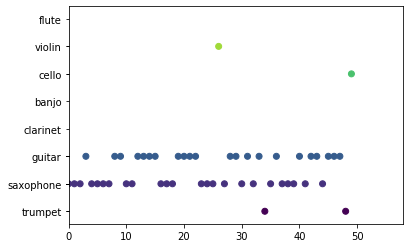

In [540]:
x = list(range(len(y)))
for i in range(len(instruments)):
    y.insert(0,i)
    x.insert(0,-1)
plt.yticks(y,instruments)
plt.xlim(left=0,right=len(y))
plt.scatter(x,y,c=y)
plt.show()

In [588]:
file_name = "/Users/syakka/Desktop/FCG_Long.mp3"
y = get_instrument_name_by_spliting(file_name)

0 th second flute
1 th second flute
2 th second flute
3 th second flute
4 th second flute
5 th second flute
6 th second flute
7 th second flute
8 th second flute
9 th second flute
10 th second flute
11 th second flute
12 th second flute
13 th second flute
14 th second flute
15 th second flute
16 th second flute
17 th second flute
18 th second flute
19 th second flute
20 th second flute
21 th second flute
22 th second flute
23 th second flute
24 th second flute
25 th second flute
26 th second flute
27 th second flute
28 th second flute
29 th second flute
30 th second flute
31 th second flute
32 th second flute
33 th second flute
34 th second flute
35 th second flute
36 th second flute
37 th second flute
38 th second flute
39 th second flute
40 th second flute
41 th second flute
42 th second flute
43 th second flute
44 th second cello
45 th second cello
46 th second cello
47 th second cello
48 th second cello
49 th second cello
50 th second cello
51 th second flute
52 th second cello
53 

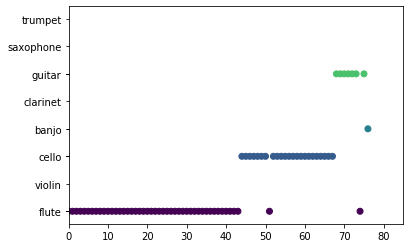

In [589]:
x = list(range(len(y)))
for i in range(len(instruments)):
    y.insert(0,i)
    x.insert(0,-1)
instruments.reverse()
plt.yticks(y,instruments)
instruments.reverse()
plt.xlim(left=0,right=len(y))
plt.scatter(x,y,c=y)
plt.show()

In [590]:
instruments_map

{'flute': 0,
 'violin': 1,
 'cello': 2,
 'banjo': 3,
 'clarinet': 4,
 'guitar': 5,
 'saxophone': 6,
 'trumpet': 7}